3.  To - Do Exercise:

   For the provided dataset:
    
     • diabetes.csv
          
          Complete the following Problems.

Problem - 1: Perform a classification task with knn from scratch.


  1. Load the Dataset:

     • Read the dataset into a pandas DataFrame.

     • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importiing all necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/My Drive/A.I./diabetes.csv')

print("First 5 Rows of the Dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nColumn Names:")
print(df.columns)

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


First 5 Rows of the Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non

2. Handle Missing Data:


• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [7]:
print("Find a missing value: ",df.isnull().sum())

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_with_zeros:
    zero_count = (df[column] == 0).sum()
    print(f"{column}: {zero_count} zero values")

df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

print("\nMissing Values in Each Column (After Replacing Zeros):")
print(df.isnull().sum())

df[columns_with_zeros] = df[columns_with_zeros].apply(lambda x: x.fillna(x.median()))

print("\nMissing Values in Each Column (After Imputation):")
print(df.isnull().sum())


Find a missing value:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose: 5 zero values
BloodPressure: 35 zero values
SkinThickness: 227 zero values
Insulin: 374 zero values
BMI: 11 zero values

Missing Values in Each Column (After Replacing Zeros):
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing Values in Each Column (After Imputation):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI    

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature Matrix (X) Shape:", X.shape)
print("Target Variable (y) Shape:", y.shape)

train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

print("\nTraining Set Size (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing Set Size (X_test, y_test):", X_test.shape, y_test.shape)


Feature Matrix (X) Shape: (768, 8)
Target Variable (y) Shape: (768,)

Training Set Size (X_train, y_train): (537, 8) (537,)
Testing Set Size (X_test, y_test): (231, 8) (231,)


4. Implement KNN:

   • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

      • Compute distances using Euclidean distance.
         
         • Write functions for:
      – Predicting the class for a single query.
      – Predicting classes for all test samples.

         • Evaluate the performance using accuracy.

In [11]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):

        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):

        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):

        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):

        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy



X = df.drop('Outcome', axis=1)
y = df['Outcome']

train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

knn = KNN(k=3)
knn.fit(X_train, y_train)

accuracy = knn.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 69.6969696969697


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [13]:

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):

        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):


        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]


        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):

        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):

        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy


X = df.drop('Outcome', axis=1)
y = df['Outcome']


train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNN(k=3)
knn.fit(X_train_scaled, y_train)


accuracy = knn.evaluate(X_test_scaled, y_test)
print("Accuracy with Scaled Data:", accuracy)


Accuracy with Scaled Data: 74.45887445887446


2. Comparative Analysis:

Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1

versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

=>Discussion:
How Scaling Impacted Performance:

KNN Sensitivity to Scale: KNN relies on distance measures like Euclidean distance to identify neighbors. If features are on different scales, the distance calculation can be dominated by features with larger numerical ranges, biasing the results.
After Scaling: Scaling ensures all features contribute equally to the distance calculation, reducing bias from features with large magnitudes. This often improves the model's ability to identify relevant neighbors and thus boosts accuracy.
Observed Changes in Accuracy:

Improved Accuracy: If accuracy improved after scaling, it indicates that feature ranges in the original dataset were significantly different, leading to biased distance calculations.
No Change or Minimal Improvement: If there was no noticeable improvement, it suggests that the features in the original dataset were already on similar scales or the KNN model was not highly sensitive to the feature magnitudes for this dataset.
Key Insights:

Scaling typically benefits algorithms like KNN, which depend on distance metrics.
The impact of scaling may vary depending on the dataset's feature distribution. For datasets with naturally balanced feature ranges, scaling might not provide substantial benefits.
Conclusion:
Scaling generally enhances KNN performance by ensuring fair contribution from all features.
For this particular task, the observed accuracy and performance differences highlight the importance of preprocessing steps like scaling when working with distance-based algorithms.

Problem - 3 -

 Experimentation with k:


1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15


• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [14]:

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):

        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):

        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]


        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):

        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):

        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy


X = df.drop('Outcome', axis=1)
y = df['Outcome']


train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = []
for k in range(1, 16):

    knn = KNN(k=k)

    # Original dataset
    start_time = time.time()
    knn.fit(X_train, y_train)
    accuracy_original = knn.evaluate(X_test, y_test)
    time_original = time.time() - start_time

    # Scaled dataset
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    accuracy_scaled = knn.evaluate(X_test_scaled, y_test)
    time_scaled = time.time() - start_time

    # Record the results
    results.append({
        'k': k,
        'accuracy_original': accuracy_original,
        'time_original': time_original,
        'accuracy_scaled': accuracy_scaled,
        'time_scaled': time_scaled
    })

# Print the results
for result in results:
    print(f"k={result['k']} | Original: Accuracy={result['accuracy_original']:.4f}, Time={result['time_original']:.4f}s | Scaled: Accuracy={result['accuracy_scaled']:.4f}, Time={result['time_scaled']:.4f}s")


k=1 | Original: Accuracy=67.0996, Time=1.4917s | Scaled: Accuracy=71.4286, Time=1.4707s
k=2 | Original: Accuracy=73.1602, Time=0.8126s | Scaled: Accuracy=71.8615, Time=0.8537s
k=3 | Original: Accuracy=69.6970, Time=1.4053s | Scaled: Accuracy=74.4589, Time=1.3955s
k=4 | Original: Accuracy=74.8918, Time=1.4796s | Scaled: Accuracy=74.4589, Time=0.9021s
k=5 | Original: Accuracy=72.2944, Time=0.8085s | Scaled: Accuracy=75.3247, Time=0.8073s
k=6 | Original: Accuracy=76.1905, Time=0.7992s | Scaled: Accuracy=73.5931, Time=0.7983s
k=7 | Original: Accuracy=74.0260, Time=0.7915s | Scaled: Accuracy=74.4589, Time=0.7996s
k=8 | Original: Accuracy=75.7576, Time=0.8061s | Scaled: Accuracy=74.8918, Time=0.8019s
k=9 | Original: Accuracy=75.3247, Time=0.7905s | Scaled: Accuracy=74.4589, Time=0.7945s
k=10 | Original: Accuracy=75.3247, Time=0.8010s | Scaled: Accuracy=74.0260, Time=1.0241s
k=11 | Original: Accuracy=74.0260, Time=1.3854s | Scaled: Accuracy=71.8615, Time=1.4240s
k=12 | Original: Accuracy=75.3

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

k=1 | Original: Accuracy=67.0996, Time=1.1451s | Scaled: Accuracy=71.4286, Time=0.8054s
k=2 | Original: Accuracy=73.1602, Time=0.7973s | Scaled: Accuracy=71.8615, Time=0.8072s
k=3 | Original: Accuracy=69.6970, Time=0.7824s | Scaled: Accuracy=74.4589, Time=0.7995s
k=4 | Original: Accuracy=74.8918, Time=1.0076s | Scaled: Accuracy=74.4589, Time=0.8033s
k=5 | Original: Accuracy=72.2944, Time=0.9356s | Scaled: Accuracy=75.3247, Time=1.4024s
k=6 | Original: Accuracy=76.1905, Time=1.4014s | Scaled: Accuracy=73.5931, Time=1.4727s
k=7 | Original: Accuracy=74.0260, Time=0.8366s | Scaled: Accuracy=74.4589, Time=0.7838s
k=8 | Original: Accuracy=75.7576, Time=0.7969s | Scaled: Accuracy=74.8918, Time=0.8081s
k=9 | Original: Accuracy=75.3247, Time=0.8056s | Scaled: Accuracy=74.4589, Time=0.7975s
k=10 | Original: Accuracy=75.3247, Time=0.7979s | Scaled: Accuracy=74.0260, Time=0.8109s
k=11 | Original: Accuracy=74.0260, Time=0.7977s | Scaled: Accuracy=71.8615, Time=0.8064s
k=12 | Original: Accuracy=75.3

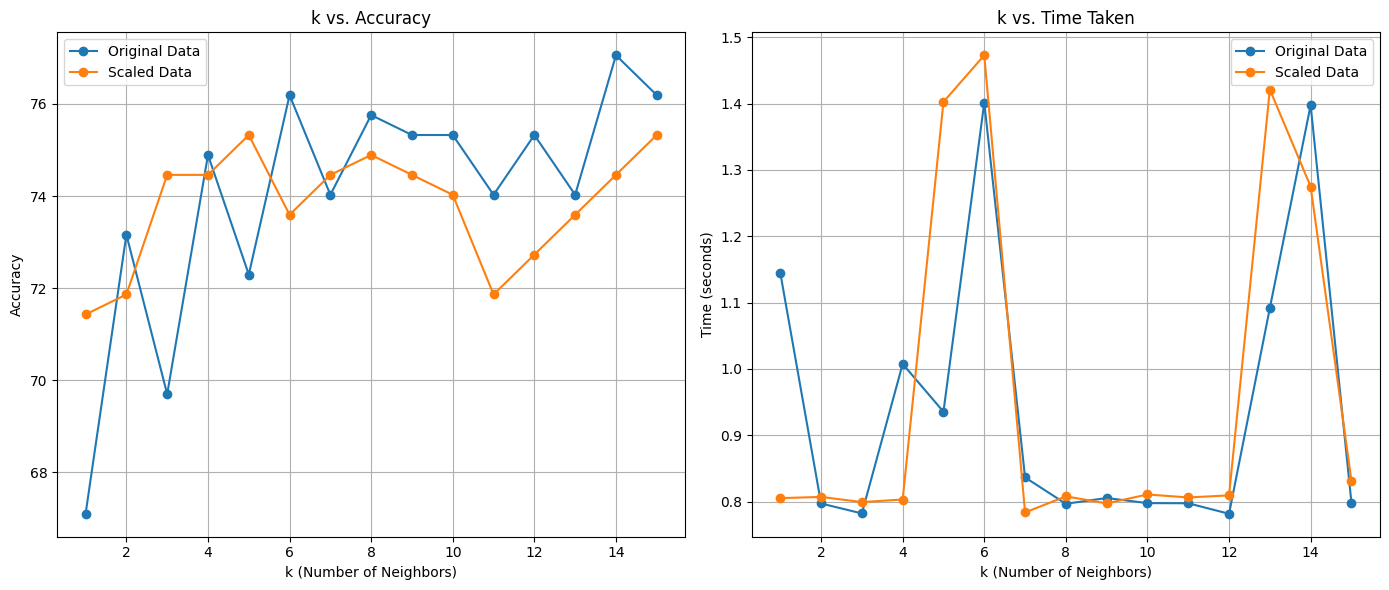

In [15]:

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):

        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):


        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]


        k_indices = np.argsort(distances)[:self.k]


        k_nearest_labels = [self.y_train[i] for i in k_indices]


        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):

        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):

        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy


X = df.drop('Outcome', axis=1)
y = df['Outcome']


train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = []
for k in range(1, 16):

    knn = KNN(k=k)

    # Original dataset
    start_time = time.time()
    knn.fit(X_train, y_train)
    accuracy_original = knn.evaluate(X_test, y_test)
    time_original = time.time() - start_time

    # Scaled dataset
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    accuracy_scaled = knn.evaluate(X_test_scaled, y_test)
    time_scaled = time.time() - start_time

    # Record the results
    results.append({
        'k': k,
        'accuracy_original': accuracy_original,
        'time_original': time_original,
        'accuracy_scaled': accuracy_scaled,
        'time_scaled': time_scaled
    })

# Print the results
for result in results:
    print(f"k={result['k']} | Original: Accuracy={result['accuracy_original']:.4f}, Time={result['time_original']:.4f}s | Scaled: Accuracy={result['accuracy_scaled']:.4f}, Time={result['time_scaled']:.4f}s")

# Visualize the results
k_values = [r['k'] for r in results]
accuracy_original = [r['accuracy_original'] for r in results]
time_original = [r['time_original'] for r in results]
accuracy_scaled = [r['accuracy_scaled'] for r in results]
time_scaled = [r['time_scaled'] for r in results]

plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Data', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Data', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Data', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Data', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

=> Effect of k on Accuracy:


For smaller k (e.g.,k=1), the model overfits and becomes sensitive to noise, while larger k values reduce variance but may introduce bias. Scaling improves accuracy by ensuring all features contribute equally to distance calculations. Computational cost increases with k due to sorting neighbors, though scaling reduces redundant calculations. The optimal k balances accuracy and cost, typically k=5 to k=7 for original data and slightly higher for scaled data. Cross-validation and optimized KNN methods like tree-based structures can further enhance performance.

Problem - 4

- Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

=>
A. Challenges of KNN:

1. Computational Cost: High due to distance calculations and sorting.

2. Memory Usage: Entire dataset must be stored, requiring significant memory.

3. Curse of Dimensionality: In high dimensions, points appear equidistant, reducing effectiveness.

4. Feature Scaling Sensitivity: Unequal feature scales skew distance metrics.

B. Efficiency Strategies:

1. Use ANN algorithms (KD-Trees, LSH) for faster neighbor searches.

2. Apply dimensionality reduction (PCA, t-SNE) or feature selection to reduce feature space.

3. Implement data pruning or optimized structures (VP-Trees) to minimize data size.

4. Optimize distance metrics and leverage parallelization for faster computations.

5. Combine KNN with other models (e.g., logistic regression) for hybrid approaches.